# SUPPORT VECTOR MACHINE

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
##### for color mapping
import matplotlib.cm as cm
#### the library of today is svm while we are using buildin datasets from sklearn
from sklearn import svm,datasets
##### 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 

LOADING BUILDIN SKILEARN DATASATS OF DIGITS 

In [3]:
digits= datasets.load_digits()


**DONE ONLY FOR UNDERSTANDING ZIO FUNCTION (NOT INCLUDED IN THIS PROJECT)bold text**

In [6]:
#####this cell is only for understanding zip 
x=[1,2,3,4]
y=['a','b','c','d']
zip(x,y)  #it will return 
list(zip(x,y)) # it will return in list form

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

CREATE LIST USING ZIP

In [9]:
images_and_labels=list(zip(digits.images,digits.target))

VIEWING DIGITS.IMAGES

In [16]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

VIEWING DIGITS.TARGET

In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

FINDING TOTAL LENGTH (NUMBER) OF SAMPLES

In [18]:
n_samples=len(digits.images)
n_samples  # we have total 1797 images

1797

CONVERTING EACH SAMPLE INTO 1D ARRAY(FLATTENING THE IMAGE)

In [22]:
data=digits.images.reshape(n_samples,-1)  # this will convert samples into 1d array (flatten).
data  # As each image is of 8x8 therefore the data will be (1797 rows,8x8=64 columns) 


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

SPILITTING DATA INTO TRAIN AND TEST BY USING A DIFFERENT TECHNIQUE.HERE WE CANNOT USE LIBRARY AS DATA IS IMAGE NOT TEXT. ALSO TRAIN THE MODEL

In [23]:
# data------> x ------> features ----->(features_train,features_test)
# digits----> y ------> target ------->(target_train,target_test)


data_split=int(n_samples*0.75)  # 75% of samples(i.e.1347) is used for training and rest 25% for testing
model=svm.SVC()
model.fit(data[:data_split],digits.target[:data_split])  #model.fit(feature_train,target_train)
          # from sample 0-1346     #from target 0-1346


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

TAKE 25% DATA AS TARGET_TEST

In [26]:
target_test=digits.target[data_split:] # taking digits from 1347 till end as test_target (i.e. 1797-1347 = 450 )


PREDICTING THE MODEL

In [27]:
predictions= model.predict(data[data_split:])  #model.predict(features_test)

CONFUSION MATRIX. HERE WE HAVE 10 PREDICTED VALUES (0-9).
OUTPUT IN 1ST ROW:
42 IN 1ST COLUMN SHOWS THAT IT HAS PRDICTED 42 VALUES AS 0 WHICH ARE CORRECT
THEN 1 IN 4TH COLUMN SHOWS THAT IT HAS WRONG PREDCITED VALUES AT THIS POSITION
WHILE 0 SHOWS THAT IT HAS PREDICTED RIGHT VALUES AT THESE POSITIONS

In [28]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  2  0  2  6  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  0  0  0  0  0 38  1]
 [ 0  0  0  1  0  1  0  1  1 41]]
0.9488888888888889


VIUALIZING USING HEATMAP

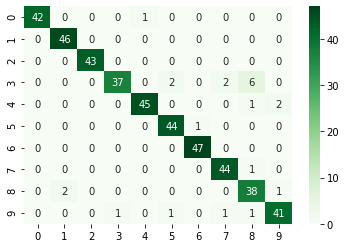

In [29]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions),annot=True,cmap='Greens')

SHOWING THE PREDICTED 5TH LAST IMAGE WITH ITS LABEL 

Prediction for test image: [9]


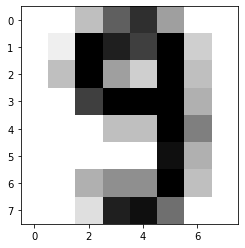

In [36]:
plt.imshow(digits.images[-5],   cmap = plt.cm.gray_r,   interpolation = "nearest")
# show image       last 5th image   show in grey scale       leave it for now
print("Prediction for test image:", model.predict(data[-5].reshape(1,-1)))
plt.show()
